In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('mode.chained_assignment',None)

In [2]:
df_preds = pd.read_csv('../sims-dump.preds.csv')
df_preds.head(10)

,tok_idx,layer_idx,I,S,T,F,C,func,source,target
0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumed session
1,1,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumed session
2,2,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumed session
3,3,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumed session
4,4,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumed session
5,0,1,0.310381,0.000707,0.211581,0.343611,0.133721,spim,Reprise de la session,Resumed session
6,1,1,0.380822,0.002276,0.093817,0.444666,0.078418,spim,Reprise de la session,Resumed session
7,2,1,0.265410,-0.000016,0.066876,0.607378,0.060351,spim,Reprise de la session,Resumed session
8,3,1,0.184576,0.090787,0.051892,0.611787,0.060958,spim,Reprise de la session,Resumed session
9,4,1,0.371161,-0.035855,0.091582,0.453715,0.119398,spim,Reprise de la session,Resumed session


In [3]:
sub_dfs_preds = []
for term in 'ISTFC':
    sub_df = df_preds[['layer_idx', term, 'func']]
    sub_df['term'] = term
    sub_df['metric'] = sub_df[term]
    del sub_df[term]
    sub_dfs_preds.append(sub_df)
melt_preds = pd.concat(sub_dfs_preds)
melt_preds.sample(10)

,layer_idx,func,term,metric
12061373,1,spim,C,0.059762
5156971,6,norm_ratio,F,2.148551
10447962,2,l2,I,13.704363
6828022,5,l2,T,15.108450
12899014,5,cosine,T,0.693517
21287,4,cosine,S,0.074510
2138754,3,norm_ratio,S,3.917911
7509978,4,spim,F,0.338945
783186,6,spim,F,0.299662
4108362,1,norm_ratio,F,1.259415


In [4]:
nr_melt = melt_preds.func == 'norm_ratio'
melt_preds[nr_melt].metric = 1 / melt_preds[nr_melt].metric

In [5]:
df_gold = pd.read_csv('../sims-dump.gold.csv')
df_gold.head(10)

,tok_idx,layer_idx,I,S,T,F,C,func,source,target
0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
1,1,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
2,2,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
3,3,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
4,4,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
5,5,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
6,6,0,1.000000,0.000000,0.000000,0.000000,0.000000,spim,Reprise de la session,Resumption of the session
7,0,1,0.310381,0.000707,0.211581,0.343611,0.133721,spim,Reprise de la session,Resumption of the session
8,1,1,0.356254,-0.008910,0.167717,0.389704,0.095236,spim,Reprise de la session,Resumption of the session
9,2,1,0.280524,-0.004883,0.067926,0.591911,0.064522,spim,Reprise de la session,Resumption of the session


In [6]:
sub_dfs_gold = []
for term in 'ISTFC':
    sub_df = df_gold[['layer_idx', term, 'func']]
    sub_df['term'] = term
    sub_df['metric'] = sub_df[term]
    del sub_df[term]
    sub_dfs_gold.append(sub_df)
melt_gold = pd.concat(sub_dfs_gold)
melt_gold.sample(10)

,layer_idx,func,term,metric
9155321,0,cosine,S,NaN
5467752,6,l2,C,70.553408
2612747,5,cosine,C,0.516836
8124130,3,spim,T,0.369472
1633801,6,norm_ratio,C,1.334514
6181952,6,norm_ratio,I,74.834389
10227073,0,spim,S,0.000000
13223345,5,cosine,F,0.729454
4539775,1,cosine,S,0.341469
6146180,5,l2,F,12.928565


In [7]:
nr_melt = melt_gold.func == 'norm_ratio'
melt_gold[nr_melt].metric = 1 / melt_gold[nr_melt].metric

In [8]:
melt_gold['targets'] = 'gold'
melt_preds['targets'] = 'preds'
melt_all = pd.concat([melt_gold, melt_preds])
subset = melt_all.sample(frac=0.1).reset_index()
ordered_funcs = subset.func.value_counts().index
subset

,index,layer_idx,func,term,metric,targets
0,7870947,1,spim,T,0.049007,gold
1,3526795,6,l2,S,102.682941,gold
2,5366978,0,l2,C,24.447435,preds
3,5228528,0,norm_ratio,S,inf,preds
4,6486407,0,spim,I,1.000000,gold
...,...,...,...,...,...,...
13332685,6834930,6,spim,F,0.354793,gold
13332686,6748571,2,spim,S,-0.003030,gold
13332687,5690457,5,l2,C,18.514601,preds
13332688,1021874,5,spim,C,0.246653,gold


In [22]:
subset = subset.sort_values(by=['term', 'targets']) #.reset_index()

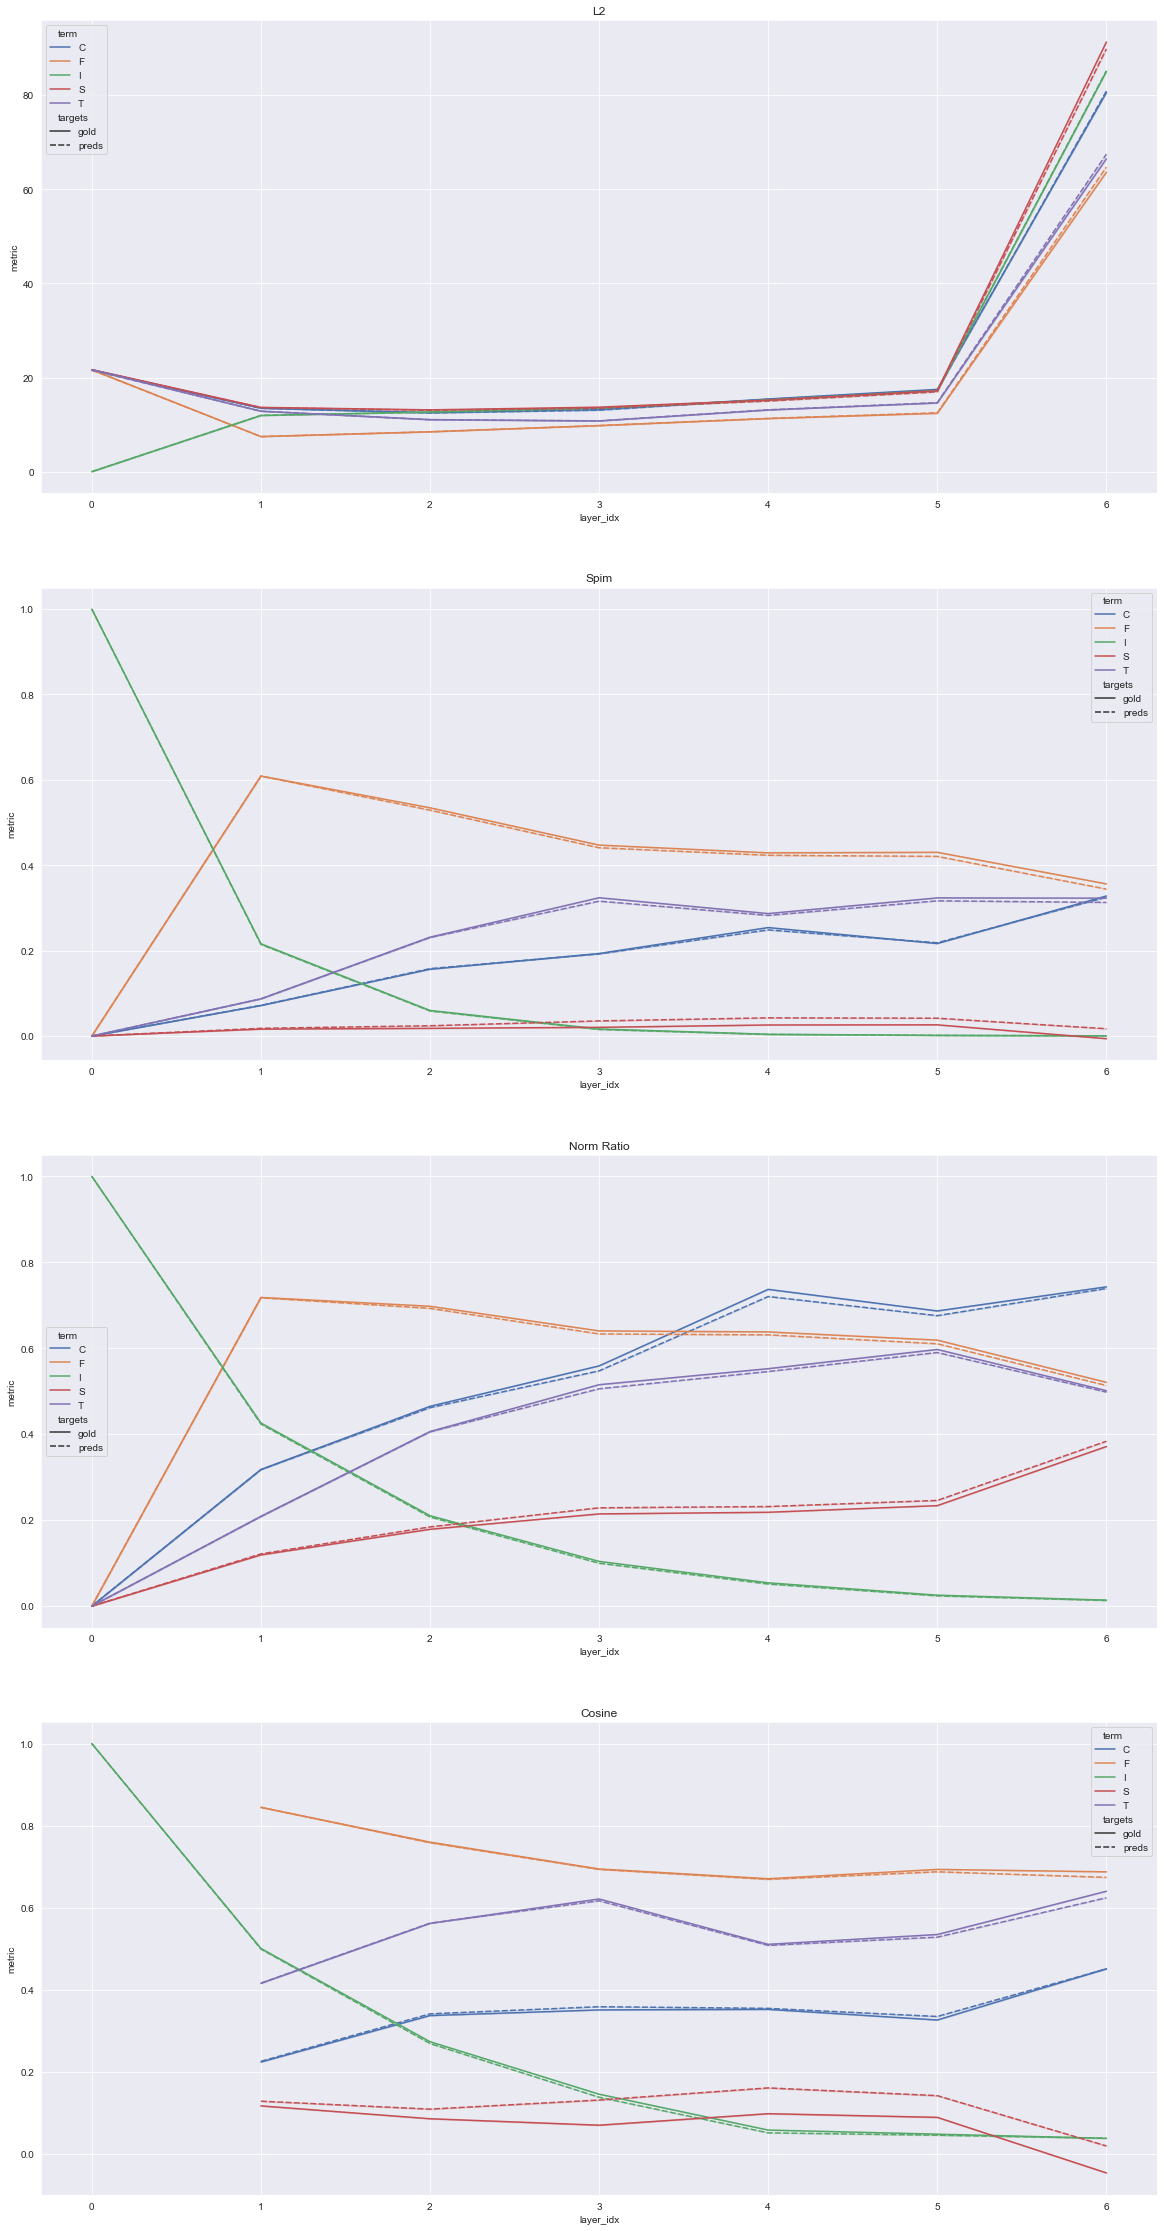

In [25]:
sns.set_theme({'figure.figsize':(20,40)})
fig = plt.figure()
for idx, func in enumerate(ordered_funcs, start=1):
    ax = fig.add_subplot(4, 1, idx)
    data = subset[subset.func==func]
    if func == 'norm_ratio':
        data['metric'] = 1 / data['metric']
    title = ' '.join(map(str.capitalize, func.split('_')))
    sns.lineplot(data=data, x='layer_idx', y='metric', hue='term', style='targets', ax=ax).set(title=title)